<a href="https://colab.research.google.com/github/Alton1998/Scoliosis/blob/main/Bagging_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
X_train_reg = []
X_test_reg = []
X_val_reg = []
y_train_reg = []
y_test_reg = []
y_val_reg = []
with open("X_train_reg.pkl","rb") as f1, open("X_test_reg.pkl","rb") as f2, open("X_val_reg.pkl","rb") as f3, open("y_train_reg.pkl","rb") as f4, open("y_test_reg.pkl","rb") as f5, open("y_val_reg.pkl","rb") as f6:
  X_train_reg = pickle.load(f1)
  X_test_reg = pickle.load(f2)
  X_val_reg = pickle.load(f3)
  y_train_reg = pickle.load(f4)
  y_test_reg = pickle.load(f5)
  y_val_reg = pickle.load(f6)

In [3]:
X_train_reg = X_train_reg.values
X_test_reg = X_test_reg.values
X_val_reg = X_val_reg.values
y_train_reg = y_train_reg.values
y_test_reg = y_test_reg.values
y_val_reg = y_val_reg.values

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
# Scaling the data based on training
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_val_reg = scaler.transform(X_val_reg)

In [7]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

In [8]:
regr = BaggingRegressor(estimator=SVR(),n_estimators=10, random_state=0)

In [9]:
regr.fit(X_train_reg,y_train_reg)


BaggingRegressor(estimator=SVR(), random_state=0)

In [10]:
y_val_pred = regr.predict(X_val_reg)

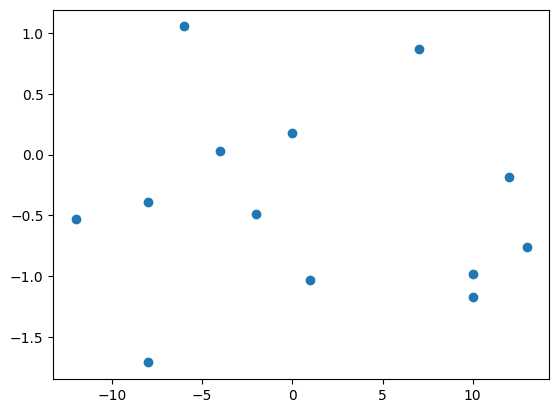

In [11]:
plt.scatter(y_val_reg,y_val_pred) # this should be a straight line essentially

In [12]:
y_test_pred = regr.predict(X_test_reg)

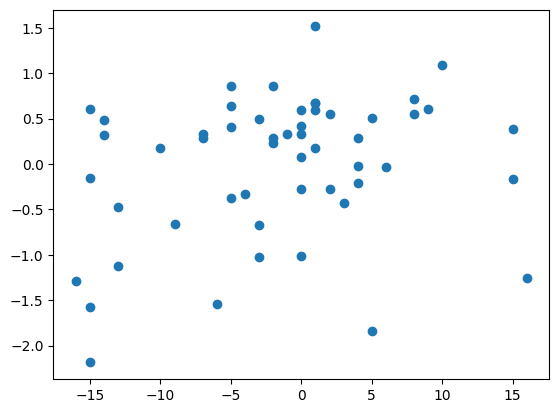

In [13]:
plt.scatter(y_test_reg,y_test_pred)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [15]:
mean_absolute_error(y_test_reg,y_test_pred)

6.123996211970942

In [16]:
mean_squared_error(y_test_reg,y_test_pred)

63.826437172692486

In [17]:
np.sqrt(mean_squared_error(y_test_reg,y_test_pred))

7.989144958798312